# Multi-class Classification Task

- Data from http://cs231n.github.io/neural-networks-case-study/

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

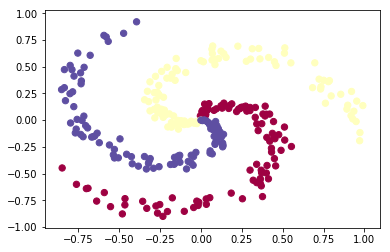

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
num_epoch=10000

x = torch.from_numpy(X).type_as(torch.FloatTensor())
y_= torch.from_numpy(y).type_as(torch.LongTensor())

print(x.size(),y_.size())

torch.Size([300, 2]) torch.Size([300])


In [6]:
model = nn.Sequential(
            nn.Linear(2,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,3),
        ).cuda()

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [7]:
label = y_.cuda()

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(Variable(x.cuda()))
    loss = loss_func(output,Variable(label))
    loss.backward()
    optimizer.step()
        
    if i % 100 == 0:
        print(loss)

Variable containing:
 1.1117
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 1.0467
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.7751
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.4545
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.2309
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.1159
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  7.6149
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  5.5658
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  4.2911
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  3.3606
[torch.cuda.FloatTensor of size 1 (GPU 0)]

